<a href="https://colab.research.google.com/github/EugeniaBar/RegresionM-ltipleCasas/blob/main/AlgebraRgresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Grupo 12 | Entrega final Álgebra 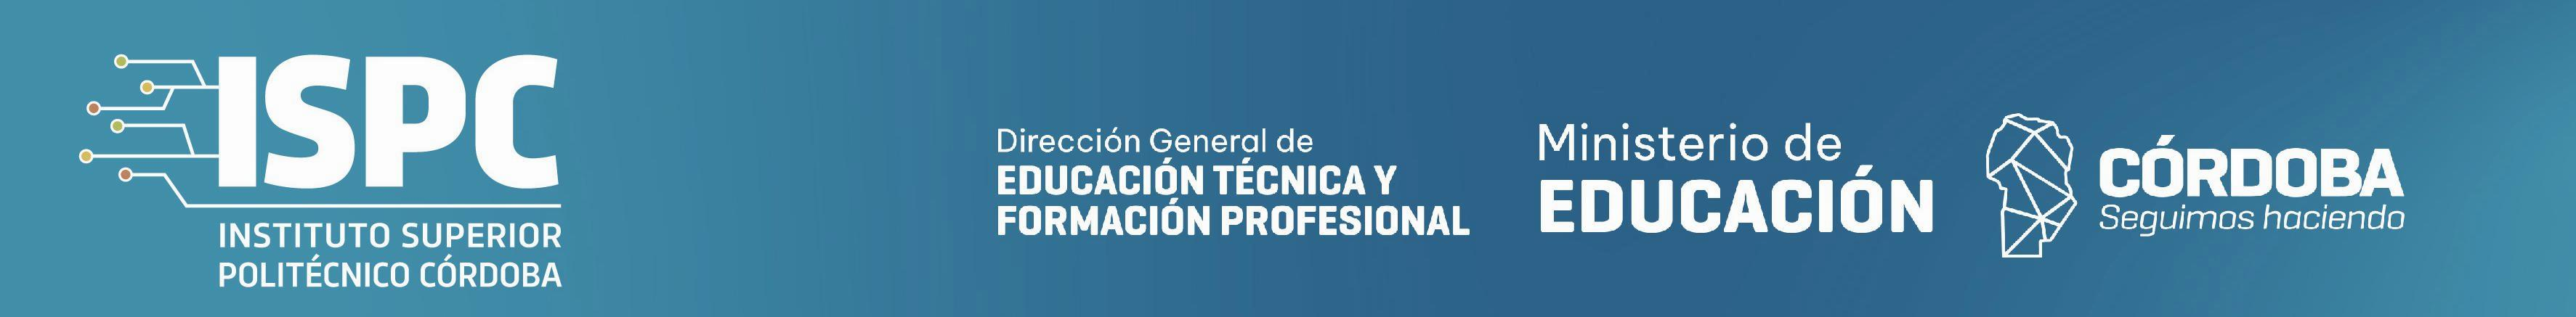



# Modelo de regresión Lineal Múltiple

Problema: predecir el precio de una casa basado en los datos, usando regresion lineal.

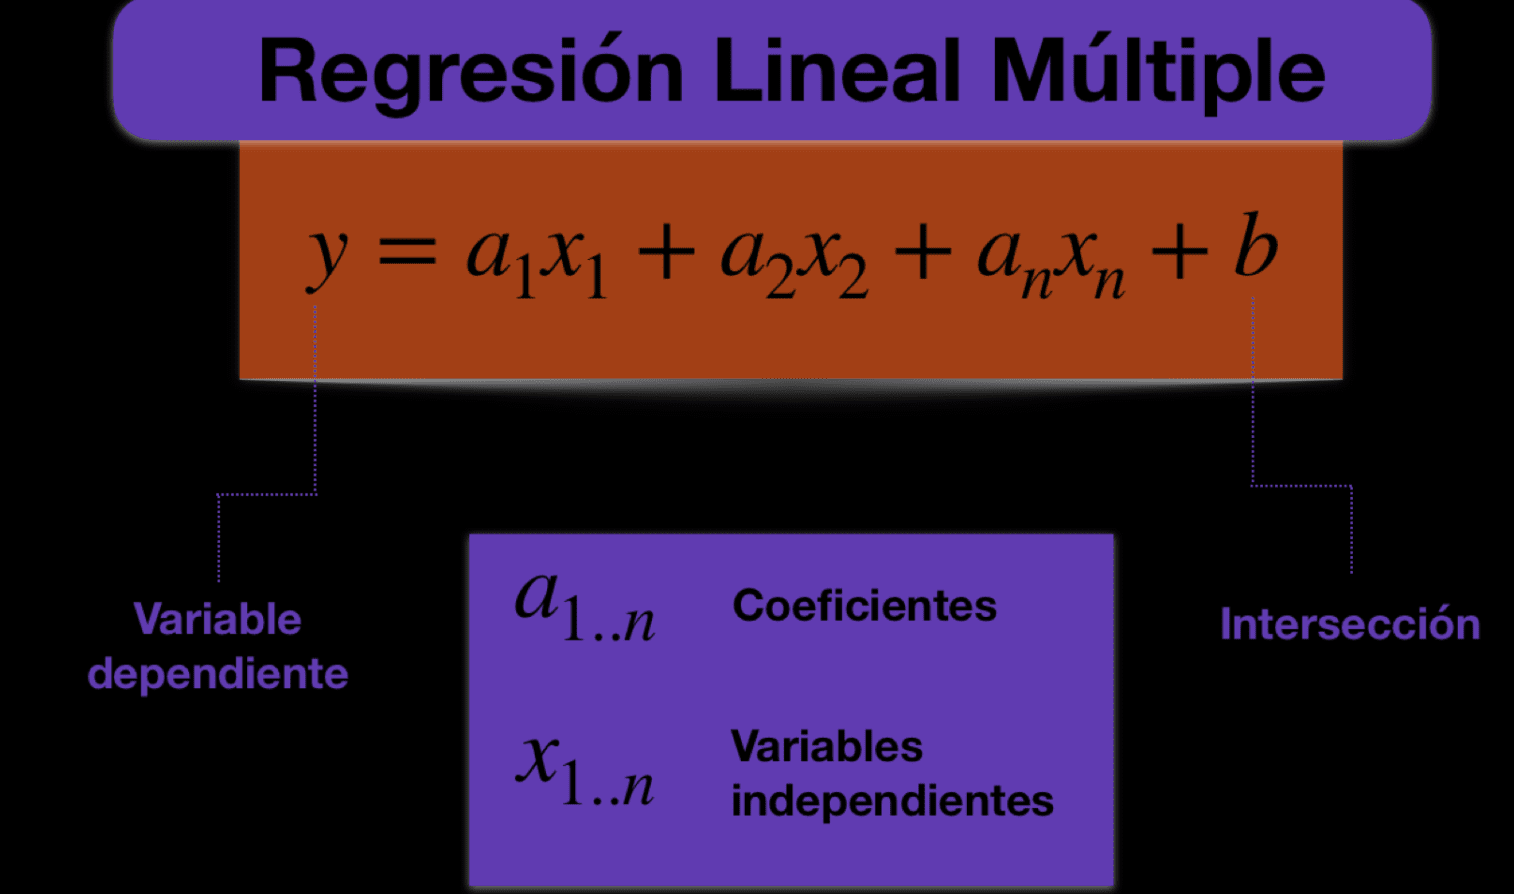

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
import pandas as pd

#data = pd.read_csv("/content/melb_data.csv", sep=',', header=0, quotechar='"', on_bad_lines='warn', names=None)
data = pd.read_csv("/content/kc_house_data.csv", sep=',', header=0, quotechar='"', on_bad_lines='warn', names=None)


In [ ]:
data.shape


(21613, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price 

In [ ]:
print(data.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')


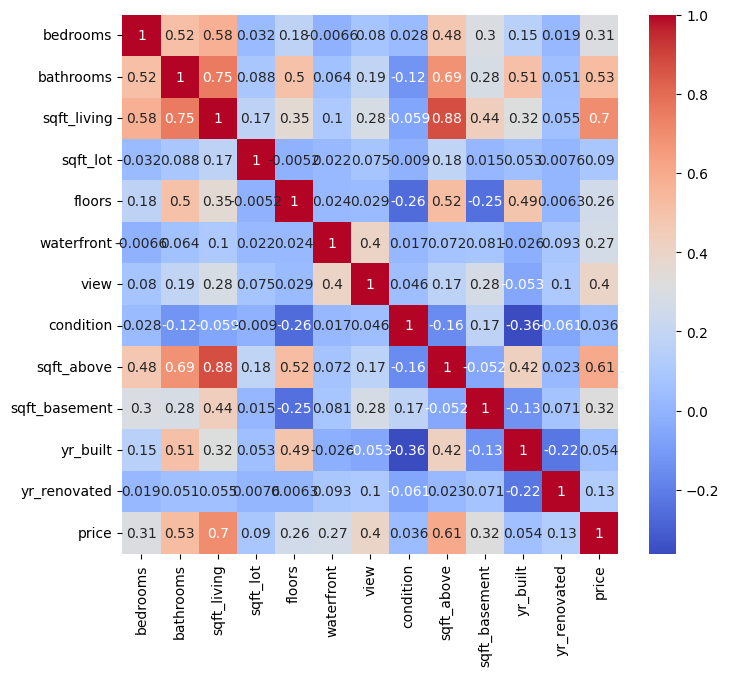

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation analysis
# Removed 'Regionname' as it's a categorical feature
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'price',]
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(8, 7))

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.show()

In [ ]:
# Separar las características (X) y la variable objetivo (y)

X = data[['bedrooms','bathrooms','sqft_basement', 'sqft_above','sqft_living']]
y = data['price']

GRaficar la relacion entre las variables y el precio

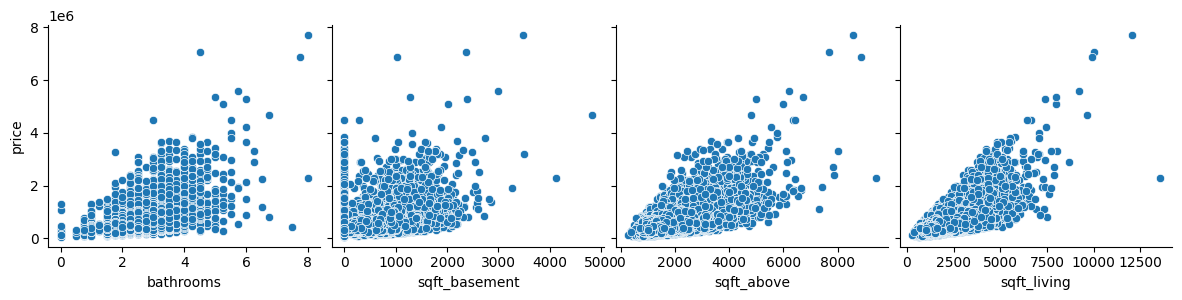

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos de dispersión pareados
sns.pairplot(data, x_vars=['bedrooms','bathrooms','sqft_basement', 'sqft_above', 'sqft_living'], y_vars='price', height=3, aspect=1)
plt.show()


1. bedrooms = Habitaciones
2. bathrooms = baños
3. sqft_basement = Tamaño del sótano en pie cuadrado
4. sqft_above = Espacio interior de la vivienda que está sobre el nivel del suelo en pie cuadrado.
5. sqft_living15: Tamaño promedio del living de las 15 casas más cerca en pie cuadrado.

- Tendencia: Si al aumentar el valor de una variable en el eje x, también aumenta (o disminuye) el valor de y (precio), podemos decir que hay una tendencia. Por ejemplo, si al aumentar el número de dormitorios el precio tiende a aumentar, decimos que hay una relación positiva. Dispersión: Si los puntos están muy dispersos, significa que la relación entre las variables es débil o que hay otros factores influyendo en el precio. Outliers: Los puntos que se alejan mucho de la tendencia general se consideran outliers. Pueden ser casos especiales o errores en los dato



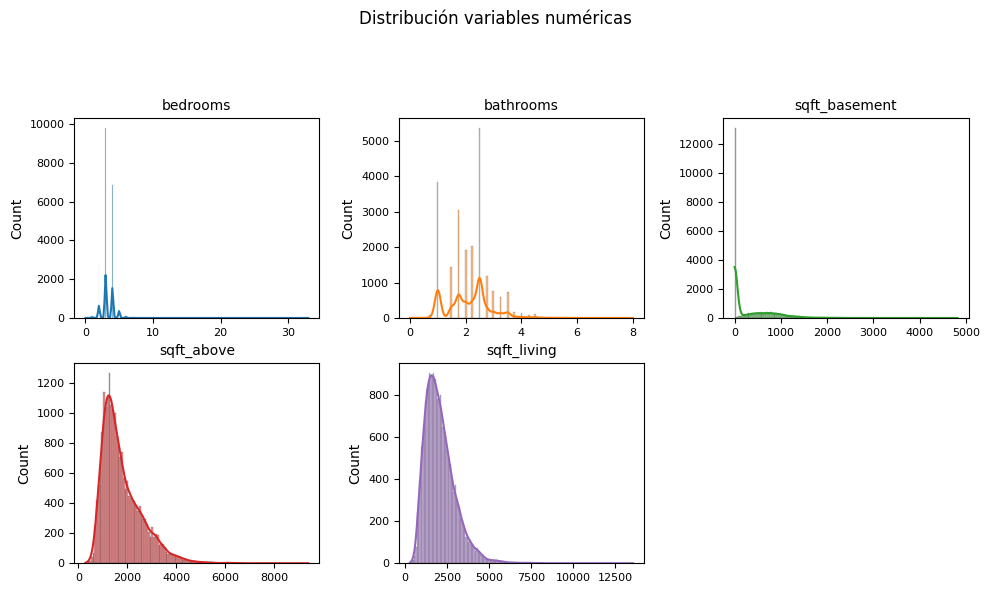

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas específicas
columnas_numeric = ['bedrooms', 'bathrooms', 'sqft_basement', 'sqft_above', 'sqft_living']

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flat

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,  # Changed 'datos' to 'data'
        x       = colum, # 'colum' should be the column name to plot
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

# Eliminar subplots vacíos si hay menos de 6 gráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Distribución variables numéricas', fontsize = 12)
plt.show()


Cada subplot es un histograma que representa la frecuencia de los valores de cada variable. Además, cada histograma incluye una curva de densidad (KDE) que te ayuda a visualizar la distribución de los datos de manera más suave.

En resumen, este gráfico te permite ver cómo se distribuyen los valores de cada una de estas variables en tu conjunto de datos, lo que puede ser útil para identificar patrones, tendencias y posibles anomalías

## Creacion de la prediccion

In [ ]:
# dividir los datos ne entranmiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')

# Impute valores faltantes a datos de entrenamiento y prueba.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# crear modelo, y entrenarlo con los datos de entrenamiento.
model = LinearRegression() #Esto genera una ecuación lineal que intenta predecir

# y (el precio) en función de las variables en X (Rooms, Bathroom, BuildingArea).
model.fit(X_train, y_train)

#Después de entrenar el modelo, se usarlo para hacer predicciones con los datos de prueba (X_test).
#El resultado de esas predicciones se guarda en y_pred.



LinearRegression()

In [ ]:
# Realizar predicciones en los datos de prueba
print(X_test)
y_pred = model.predict(X_test)

[[4.000e+00 2.250e+00 0.000e+00 2.070e+03 2.070e+03]
 [5.000e+00 3.000e+00 1.070e+03 1.830e+03 2.900e+03]
 [4.000e+00 2.500e+00 0.000e+00 3.770e+03 3.770e+03]
 ...
 [4.000e+00 2.500e+00 0.000e+00 2.434e+03 2.434e+03]
 [4.000e+00 1.750e+00 0.000e+00 2.250e+03 2.250e+03]
 [4.000e+00 2.500e+00 0.000e+00 2.570e+03 2.570e+03]]


In [ ]:
# Crear un DataFrame para comparar
comparar = pd.DataFrame({'Predicciones': y_pred[:5], 'Valores Reales': y_test[:5]})
print(comparar)

       Predicciones  Valores Reales
735    4.927120e+05          365000
2830   7.210640e+05          865000
4106   1.003688e+06         1038000
16218  1.317032e+06         1490000
19964  7.005840e+05          711000


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Coeficiente de determinación R^2: {r2:.2f}')
print(f'Error cuadrático medio (MSE): {mse:.2f}')

# Crar ols modelo summary
X_train_sm = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train_sm).fit()

# Mostrar el resumen del modelo
print(result.summary())

Coeficiente de determinación R^2: 0.51
Error cuadrático medio (MSE): 74198772469.47
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     4450.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:48:29   Log-Likelihood:            -2.3969e+05
No. Observations:               17290   AIC:                         4.794e+05
Df Residuals:                   17285   BIC:                         4.794e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

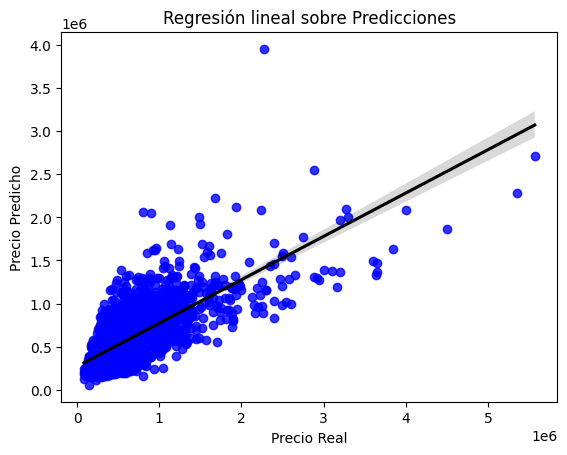

Intersección (b) 80040.04794679
Pendiente (m) [-6.12521533e+04  1.70877649e+04 -4.40494157e+15 -4.40494157e+15
  4.40494157e+15]


In [ ]:
# Visualización con línea de regresión ajustada (evaluando la calidad del modelo)

sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

plt.xlabel('Precio Real')

plt.ylabel('Precio Predicho')

plt.title('Regresión lineal sobre Predicciones')

plt.show()

# Imprimir la intersección y pendientes
print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)

#. Interpretación:
 Si los puntos azules están cerca de la línea negra
𝑦
=
𝑥
y=x, significa que las predicciones están acertadas.
Los puntos que se alejan mucho de esa línea,indican errores en las predicciones (es decir, que el modelo no predice bien para esos valores específicos).
Este gráfico te permite ver más fácilmente si las predicciones del modelo son buenas o si hay discrepancias significativas.

LO que nos muestra la gráfica: Una relación positiva a medida que aumentan las variables de 'bedrooms','bathrooms','sqft_basement', aumenta el valor de la propiedad. Pero hay cierta variabilidad en los datos que la recta de regresion no captura por completo.

Métricas de evaluación:
EL r2 es de 0.51, este valor indica que aproximadamente el 50% de lavariabilidad en la variable dependiente puede ser explicada por las variables independientes. Es decir el modelo de regresion lineal explica una proporcion moderada de la variabilidad en los datos.



z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y


print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)